# Problem Statement

### Business Use Case

To **increase the revenue** for any bank the fundamental task is for the customers to deposit more and for longer period of time. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, a term deposit client is more likely to make more purchases such as funds or insurance to further increase the bank's revenues. Here we try to predict if the client will subscribe to a term deposit based on the **analysis of the marketing campaigns the bank performed.**
### Data Science Problem Statement

Predict if the client will subscribe to a term deposit based on the analysis of the marketing campaigns the bank performed.

### Evaluation Metric
We will be using Precision/Recall for evaluation. 


# Understanding the dataset

**Data Set Information**

The data is related to direct marketing campaigns of a banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be subscribed ('yes') or not ('no') subscribed.

There are two datasets:
**`train.csv` ** with all examples (32950) and 16 inputs including the target feature, ordered by date (from May 2019 to November 2021)

**`test.csv` **which is the test data that consists  of 8238 observations and 15 features without the target feature

**Goal:- The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).**

**Features**

|Feature|Feature_Type|Description|
|-----|-----|-----|
|age|numeric|age of a person|  
|job |Categorical,nominal|type of job ('admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')|  
|marital|categorical,nominal|marital status ('divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)|  
|education|categorical,nominal| ('basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown') | 
|default|categorical,nominal| has credit in default? ('no','yes','unknown')|  
|housing|categorical,nominal| has housing loan? ('no','yes','unknown')|  
|loan|categorical,nominal| has personal loan? ('no','yes','unknown')|  
|contact|categorical,nominal| contact communication type ('cellular','telephone')|  
|month|categorical,ordinal| last contact month of year ('jan', 'feb', 'mar', ..., 'nov', 'dec')| 
|day_of_week|categorical,ordinal| last contact day of the week ('mon','tue','wed','thu','fri')|  
|duration|numeric| last contact duration, in seconds . Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no')|
|campaign|numeric|number of contacts performed during this campaign and for this client (includes last contact)|  
|pdays|numeric| number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)|  
|previous|numeric| number of contacts performed before this campaign and for this client|  
|poutcome|categorical,nominal| outcome of the previous marketing campaign ('failure','nonexistent','success')|  

**Target variable (desired output):**  

|Feature|Feature_Type|Description|
|-----|-----|-----|
|y | binary| has the client subscribed a term deposit? ('yes','no')|

###  Importing necessary libraries

The following code is written in Python 3.x. Libraries provide pre-written functionality to perform necessary tasks.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

###  Importing necessary libraries

The following code is written in Python 3.x. Libraries provide pre-written functionality to perform necessary tasks.

In [2]:
from sklearn.preprocessing import LabelEncoder
from scipy.stats.mstats import winsorize

## Data Loading and Cleaning




### Load and Prepare dataset

- In this task, we'll load the dataframe in pandas,and display the first five rows of the dataset.

In [3]:
# accessing to the folder where the file is stored
path = '/content/new_train.csv'

# Load the dataframe
dataframe = pd.read_csv(path)

print('Shape of the data is: ',dataframe.shape)

dataframe.head()



Shape of the data is:  (32950, 16)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


### Check Numeric and Categorical Features

Our dataset consists of numerical and categorical columns.

Looking at the dataset, we think we can identify the categorical and continuous columns in it. Right? But it might also be possible that the numerical values are represented as strings in some feature. Or the categorical values in some features might be represented as some other datatypes instead of strings. Hence it's good to check for the datatypes of all the features.


In [4]:

# IDENTIFYING NUMERICAL FEATURES

numeric_data = dataframe.select_dtypes(include=np.number) # select_dtypes selects data with numeric features
numeric_col = numeric_data.columns                        # we will store the numeric features in a variable
print(numeric_col)
print("Numeric Features:")
print(numeric_data.head())
print("===="*20)

Index(['age', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')
Numeric Features:
   age  duration  campaign  pdays  previous
0   49       227         4    999         0
1   37       202         2    999         1
2   78      1148         1    999         0
3   36       120         2    999         0
4   59       368         2    999         0


In [5]:

# IDENTIFYING CATEGORICAL FEATURES
categorical_data = dataframe.select_dtypes(include=['object','category'])       # we include only the objects and the category
categorical_col = categorical_data.columns                                      # we will store the categorical features in a variable

print(categorical_col)
print("Categorical Features:")
print(categorical_data.head())
print("===="*20)


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')
Categorical Features:
            job   marital          education  default housing loan    contact  \
0   blue-collar   married           basic.9y  unknown      no   no   cellular   
1  entrepreneur   married  university.degree       no      no   no  telephone   
2       retired   married           basic.4y       no      no   no   cellular   
3        admin.   married  university.degree       no     yes   no  telephone   
4       retired  divorced  university.degree       no      no   no   cellular   

  month day_of_week     poutcome    y  
0   nov         wed  nonexistent   no  
1   nov         wed      failure   no  
2   jul         mon  nonexistent  yes  
3   may         mon  nonexistent   no  
4   jun         tue  nonexistent   no  


In [6]:
# CHECK THE DATATYPES OF ALL COLUMNS:
    
print(dataframe.dtypes)


age             int64
job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object


In [7]:
dataframe.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
count,32950.000000,32950,32950,32950,32950,32950,32950,32950,32950,32950,32950.000000,32950.000000,32950.000000,32950.000000,32950,32950
unique,NaN,12,4,8,3,3,3,2,10,5,NaN,NaN,NaN,NaN,3,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,NaN,nonexistent,no
freq,NaN,8314,19953,9736,26007,17254,27131,20908,11011,6857,NaN,NaN,NaN,NaN,28416,29238
mean,40.014112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.127466,2.560607,962.052413,0.174719,NaN,NaN
std,10.403636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.975917,2.752326,187.951096,0.499025,NaN,NaN
min,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.000000,1.000000,999.000000,0.000000,NaN,NaN
50%,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,2.000000,999.000000,0.000000,NaN,NaN
75%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319.000000,3.000000,999.000000,0.000000,NaN,NaN


### Check Missing Data 

One of the main steps in data preprocessing is handling missing data. Missing data means absence of observations in columns that can be caused while procuring the data, lack of information, incomplete results etc. Feeding missing data to your machine learning model could lead to wrong prediction or classification( such as KNN algorithm). Also, most Machine learning models could not be applied in the presence of such missing values. Hence it is necessary to identify missing values and treat them.

- In the code below, we calculate the total missing values and the percentage of missing values in every feature of the dataset.


In [8]:
dataframe.replace(['unknown','Na'],np.nan,inplace=True)

In [9]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32685 non-null  object
 2   marital      32885 non-null  object
 3   education    31553 non-null  object
 4   default      26010 non-null  object
 5   housing      32154 non-null  object
 6   loan         32154 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [10]:
# to identify the number of missing values in every features

# finding the total missing values and arranging them in ascending order

total=dataframe.isnull().sum()
total

age               0
job             265
marital          65
education      1397
default        6940
housing         796
loan            796
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
y                 0
dtype: int64

In [11]:
percentage=dataframe.isnull().sum()/len(dataframe)*100
print(percentage)

age             0.000000
job             0.804249
marital         0.197269
education       4.239757
default        21.062215
housing         2.415781
loan            2.415781
contact         0.000000
month           0.000000
day_of_week     0.000000
duration        0.000000
campaign        0.000000
pdays           0.000000
previous        0.000000
poutcome        0.000000
y               0.000000
dtype: float64



There are two methods of dealing with missing data 
- Dropping them
- Imputing them.

Depending on the case we can allow a specific proportion of missing values, beyond which we might want to drop the variable from analysis.

This varies from case to case on the amount of information you think the variable has. For example, if you are working on some dataset which contains a column for date of marriage. It may be blank for 50% (or even more) of the population, but might have very high information about the lifestyle of the person. In such cases, you would still use the variable.

If the information contained in the variable is not that high, you can drop the variable if it has more than 50% missing values. There are projects / models where imputation of even 20 - 30% missing values provided better results - the famous Titanic dataset on Kaggle being one such case. Age is missing in ~20% of cases, but you benefit by imputing them rather than ignoring the variable.

- Now you have the number and percentage of missing values in every feature, from the previous function. 
- Using this information, you can decide as to what proportion of missing values you should remove from every feature.


## Fill null values in categorical features

 A good approach would be to impute the null values in categorical features

There exists many approach to missing-data imputation and they usually depend on your problem and how your data algorithm behaves. If the features are numeric you can use simple approaches, such as average values and sampling from the feature distribution.

- Missing values in continuous data are mostly imputed using mean or median. What to choose depends on a lot of factors and is to be decided by you
- Missing values in categorical data are mostly imputed using mode.

In [12]:
# Impute mising values of categorical data with mode
for column in categorical_col:
    mode = dataframe[column].mode()[0]
    dataframe[column] = dataframe[column].replace(np.nan,mode)

### Check for Class Imbalance

Class imbalance occurs when the observations belonging to one class in the target are significantly higher than the other class or classes. A class distribution of **80:20 or greater** is typically considered as an imbalance for a binary classification. 

Since most machine learning algorithms assume that data is equally distributed, applying them on imbalanced data often results in bias towards majority classes and poor classification of minority classes. Hence we need to identify & deal with class imbalance. 


In [13]:
# we are finding the percentage of each class in the feature 'y'
print(dataframe['y'].value_counts())
print("=="*50)
class_values = (dataframe['y'].value_counts()/dataframe['y'].value_counts().sum())*100
print(class_values)

no     29238
yes     3712
Name: y, dtype: int64
no     88.734446
yes    11.265554
Name: y, dtype: float64


Text(0.5, 1.0, 'Y')

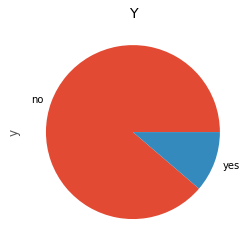

In [17]:
# Plotting a Pie Chart to visualise the class imbalance
plt.figure(figsize=(20,4))
#plt.subplot(121)
dataframe["y"].value_counts().plot(kind='pie')
plt.title("Y")


### Observations : 
- The class distribution in the target is ~88.73 (Clearly visible from the pie chart here).This is a clear indication of imbalance.


### Detect outliers in the numeric columns

Outliers are observations that lie far away from majority of observations in the dataset and can be represented mathematically in different ways.

One method of defining outliers are: outliers are data points lying beyond **(third quartile + 1.5xIQR)** and below **(first quartile - 1.5xIQR)**. 


In [18]:
def detect_outliers(x):
    q1, q3 = np.percentile(x, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return np.where((x > upper_bound) | (x < lower_bound))
for col in numeric_data:
    print(detect_outliers(dataframe[col]))

(array([    2,    68,    88,   109,   280,   550,   654,   706,   731,
         774,   891,  1106,  1280,  1285,  1313,  1415,  1566,  1771,
        1819,  1860,  2029,  2057,  2191,  2225,  2290,  2350,  2381,
        2509,  2838,  2889,  2992,  3012,  3139,  3169,  3212,  3298,
        3315,  3336,  3368,  3433,  3437,  3523,  3618,  3740,  3760,
        3781,  3833,  3888,  4061,  4245,  4310,  4371,  4427,  4471,
        4534,  4643,  4800,  4896,  4906,  5089,  5132,  5239,  5304,
        5312,  5368,  5372,  5397,  5429,  5440,  5453,  5513,  5577,
        5702,  5755,  5792,  5870,  6014,  6063,  6264,  6302,  6358,
        6407,  6423,  6501,  6523,  6919,  6948,  7163,  7348,  7502,
        7981,  8004,  8053,  8259,  8289,  8372,  8520,  8540,  8574,
        8590,  8739,  8790,  8814,  8894,  8963,  9080,  9180,  9290,
        9486,  9637,  9679,  9738,  9896,  9945, 10038, 10430, 10481,
       10715, 10849, 11140, 11244, 11363, 11381, 11641, 11717, 11735,
       11843, 11846

### Observations :
- As per the IQR methodology, there are outliers in all of the columns.
- In the further steps below, we will see how to deal with the outliers (winsorization)

## EDA & Data Visualizations

Exploratory data analysis is an approach to analyzing data sets by summarizing their main characteristics with visualizations. The EDA process is a crucial step prior to building a model in order to unravel various insights that later become important in developing a robust algorithmic model. 

###  Univariate analysis of Categorical columns

Univariate analysis means analysis of a single variable. It’s mainly describes the characteristics of the variable.

If the variable is categorical we can use either a bar chart or a pie chart to find the distribution of the classes in the variable.

- The code plots the frequency of all the values in the categorical variables. 


### Checking the no of labels for the categorical variable 

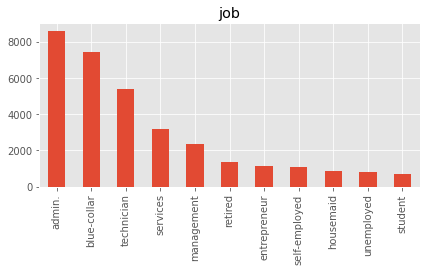

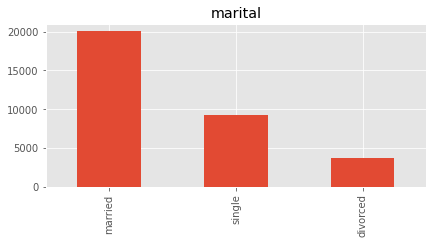

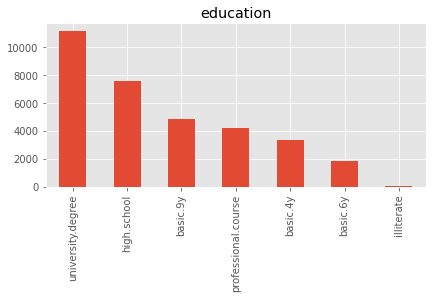

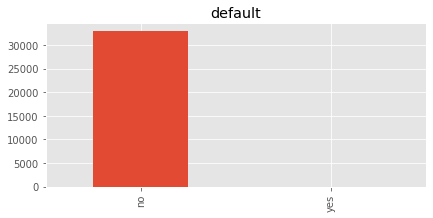

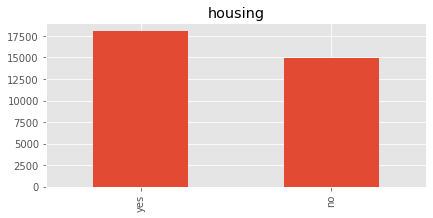

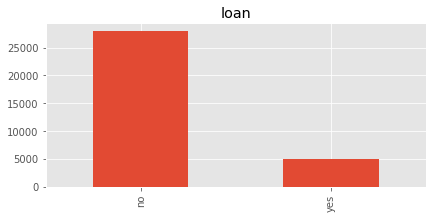

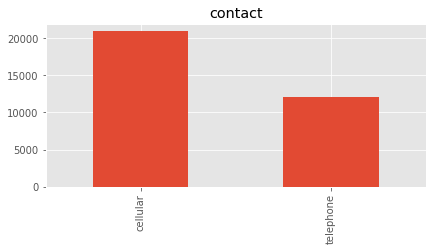

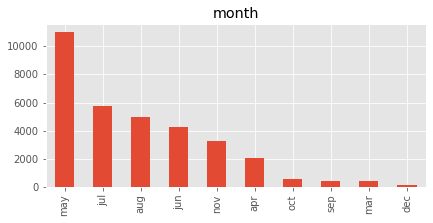

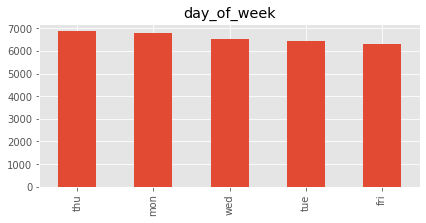

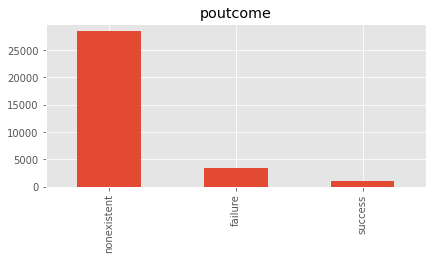

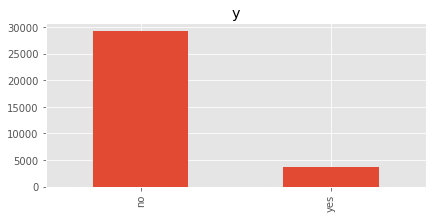

In [19]:
plt.style.use('ggplot')
# Plotting a bar chart for each of the cateorical variable
for column in categorical_col:
    plt.figure(figsize=(15,3))
    plt.subplot(121)
    dataframe[column].value_counts().plot(kind='bar')
    plt.title(column)

### Observations :

From the above visuals, we can make the following observations: 
- The top three professions that our customers belong to are - administration, blue-collar jobs and technicians.
- A huge number of the customers are married.
- Majority of the customers do not have a credit in default
- Many of our past customers have applied for a housing loan but very few have applied for personal loans.
- Cell-phones seem to be the most favoured method of reaching out to customers.
- Many customers have been contacted in the month of **May**.
- The plot for the target variable shows heavy imbalance. 


### Univariate analysis of Continuous columns
Just like for categorical columns, by performing a univariate analysis on the continuous columns, we can get a sense of the distrbution of values in every column and of the outliers in the data. Histograms are great for plotting the distribution of the data and boxplots are the best choice for visualizing outliers. 

- The code below plots a histogram of all the continuous features and other that plots a boxplot of the same.

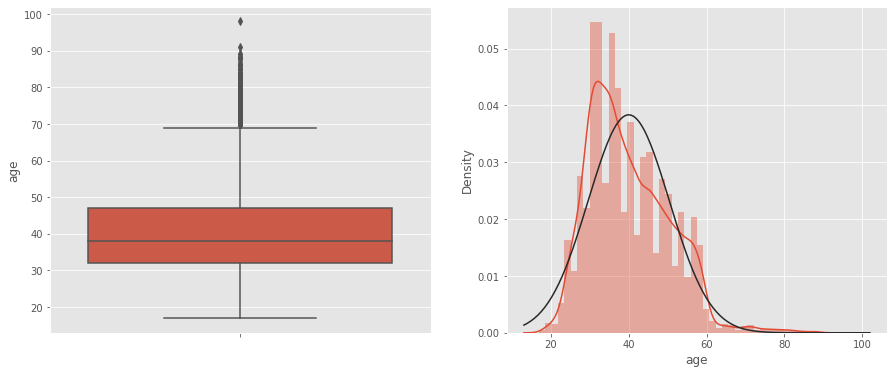

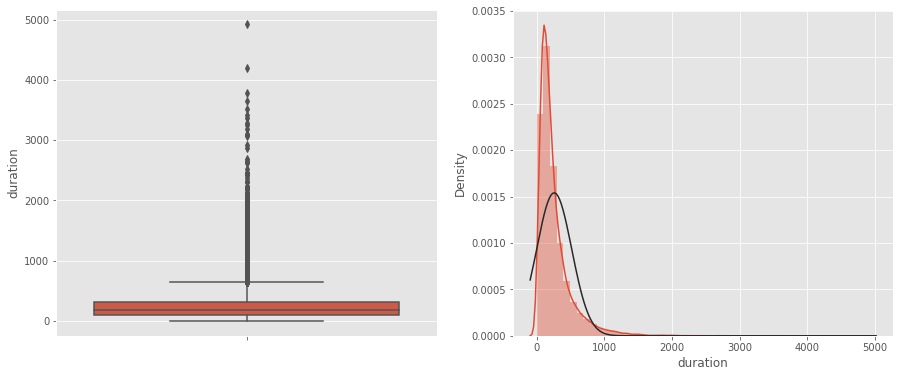

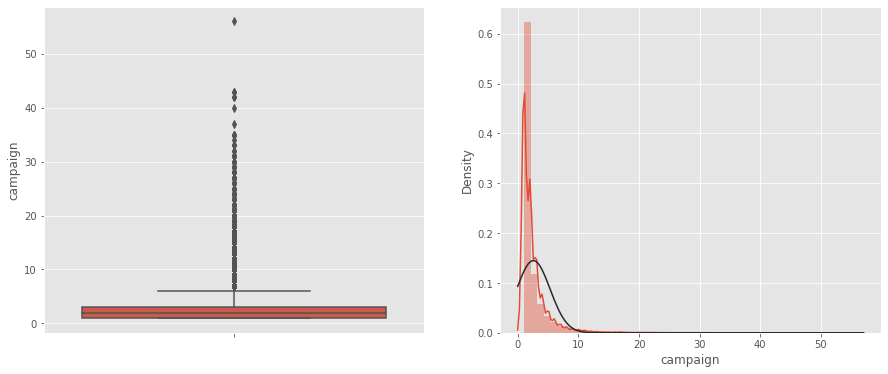

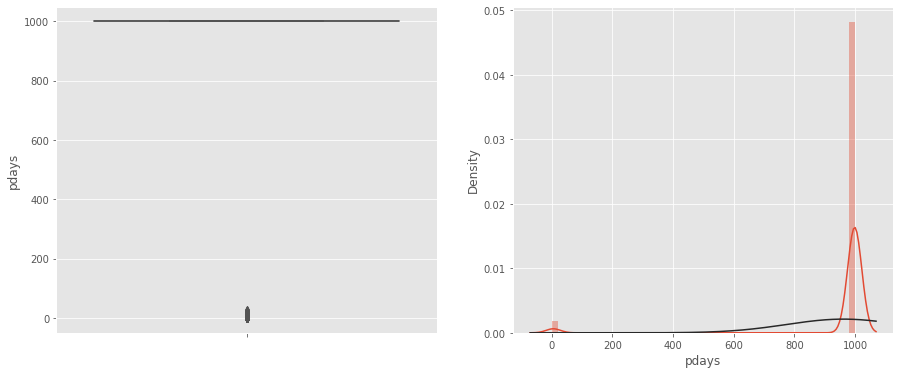

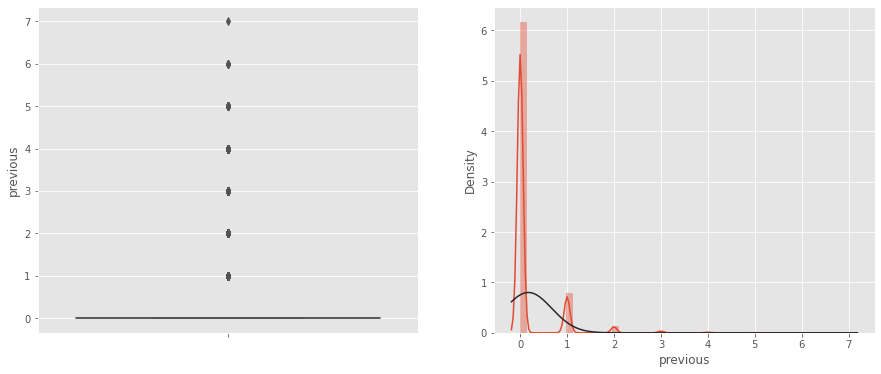

In [20]:
for var in numeric_col :
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=dataframe[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(dataframe[var].dropna(),fit=norm)
   # fig.set_ylabel('Number of houses')
    fig.set_xlabel(var)

    plt.show()

## Correlation heatmap

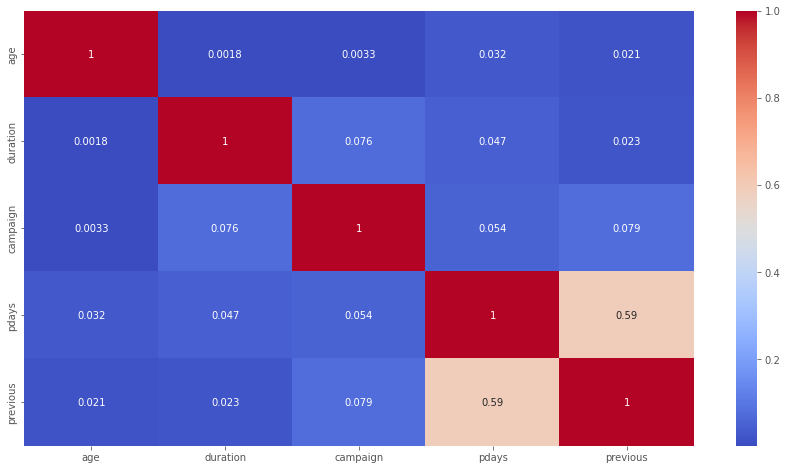

In [21]:
plt.figure(figsize=(15,8))
correlation = dataframe.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

### Observation :
- As we can see from the histogram, the features `age`, `duration` and `campaign` are heavily skewed and this is due to the presence of outliers as seen in the boxplot for these features. 
- Looking at the plot for `pdays`, we can infer that majority of the customers were being contacted for the first time because as per the feature description for `pdays` the value 999 indicates that the customer had not been contacted previously. 
Since the features `pdays` and `previous` consist majorly only of a single value, their variance is quite less and they is highly correlated to each other so we can **drop them since technically will be of no help in prediction**

### Dropping the columns `pdays` & `previous`

In [22]:
dataframe.drop(['pdays','previous'],1,inplace=True)

### Check for Multicollinearty

In [23]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

calc_vif(dataframe[[i for i in dataframe.describe().columns ]])

,variables,VIF
0,age,2.672412
1,duration,1.874437
2,campaign,1.771622


### Treating outliers in the continuous columns

- Outliers can be treated in a variety of ways. It depends on the skewness of the feature.
- To reduce right skewness, we use roots or logarithms or reciprocals (roots are weakest). This is the most common problem in practice.
- To reduce left skewness, we take squares or cubes or higher powers.
- But in our data, some of the features have negative values and also the value 0. In such cases, square root transform or logarithmic transformation cannot be used since we cannot take square root of negative values and logarithm of zero is not defined.
- Hence for this data we use a method called **Winsorization**. In this method we define a confidence interval of let's say 90% and then replace all the outliers below the 5th percentile with the value at 5th percentile and all the values above 95th percentile with the value at the 95th percentile. It is pretty useful when there are negative values and zeros in the features which cannot be treated with log transforms or square roots.



In [24]:
numeric_col = dataframe.select_dtypes(include=np.number).columns

for col in numeric_col:    
  dataframe[col] = winsorize(dataframe[col], limits=[0.1, 0.1],inclusive=(True, True))


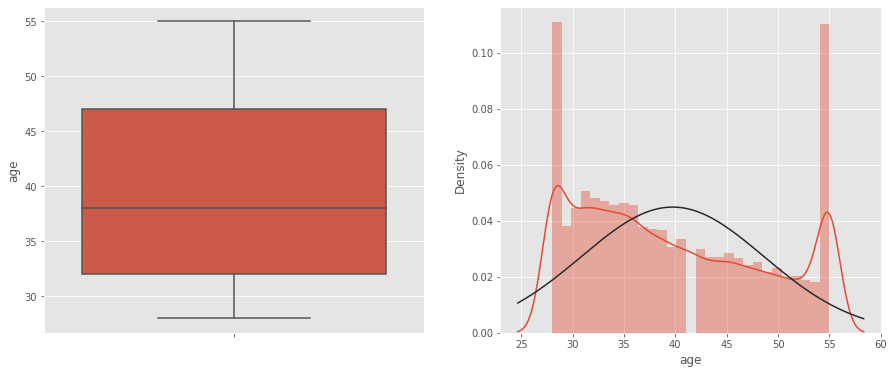

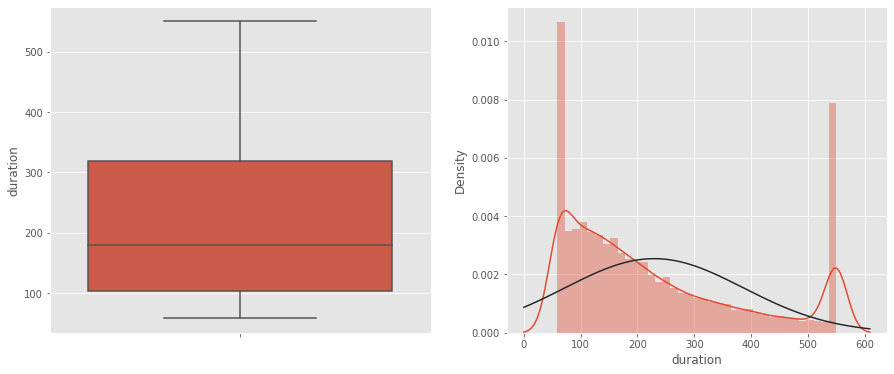

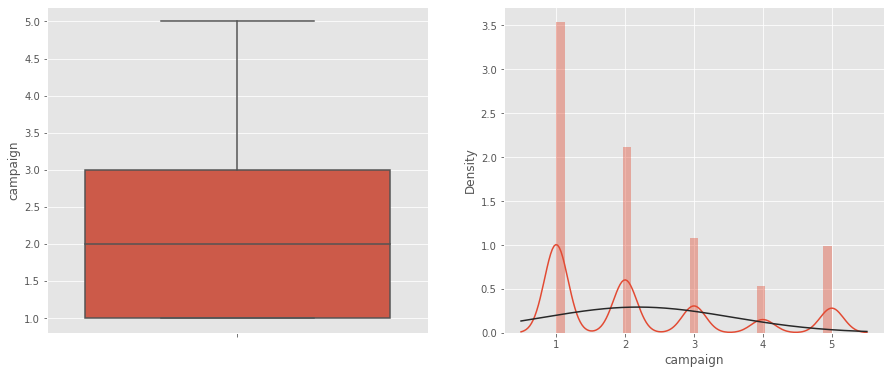

In [25]:
#Visualising the numeric col after outlier removal ( winsorization) using boxplots and histograms
for var in numeric_col :
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=dataframe[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(dataframe[var].dropna(),fit=norm)
   # fig.set_ylabel('Number of houses')
    fig.set_xlabel(var)

    plt.show()

### Observation :

Using winsorization has resulted in removal of all the outliers from the numerical columns.  

## Bivariate Analysis - Categorical Columns

Bivariate analysis involves checking the relationship between two variables simultaneously. In the code below, we plot every categorical feature against the target by plotting a barchart. 

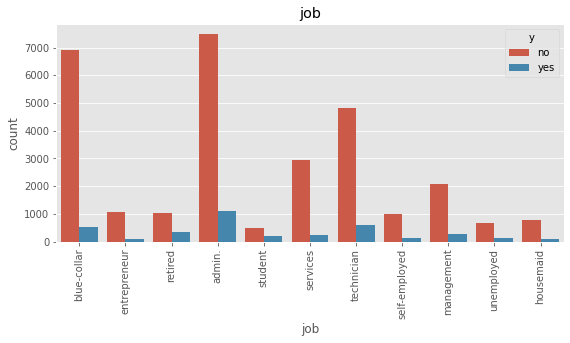

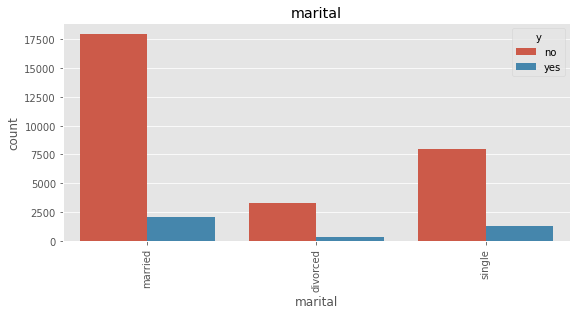

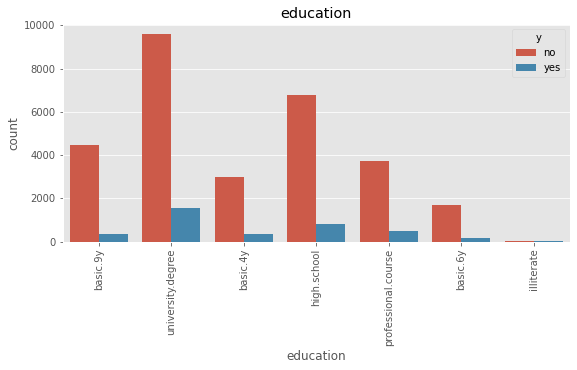

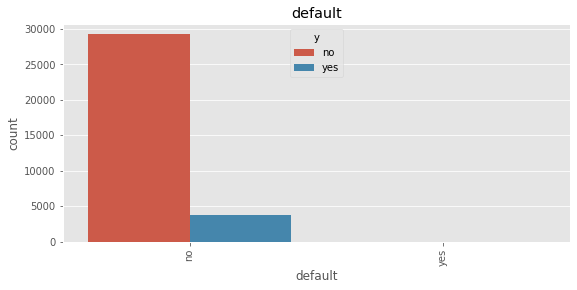

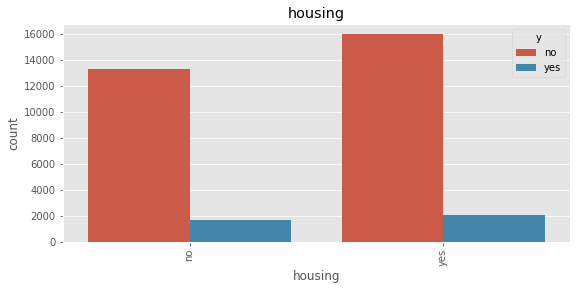

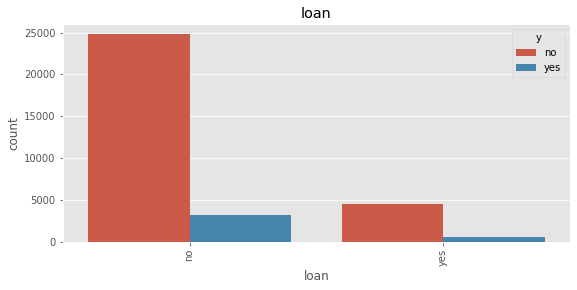

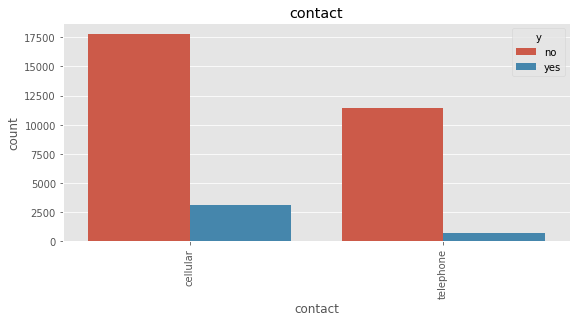

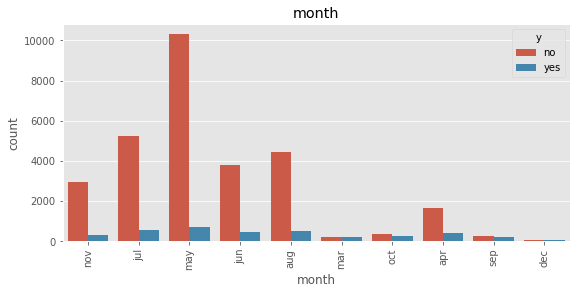

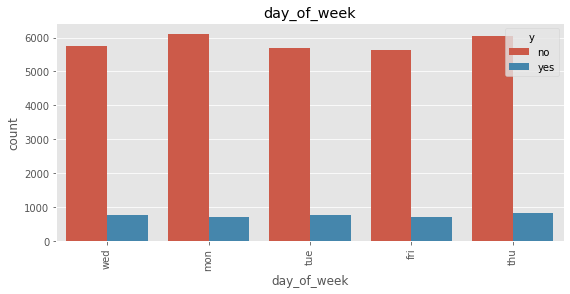

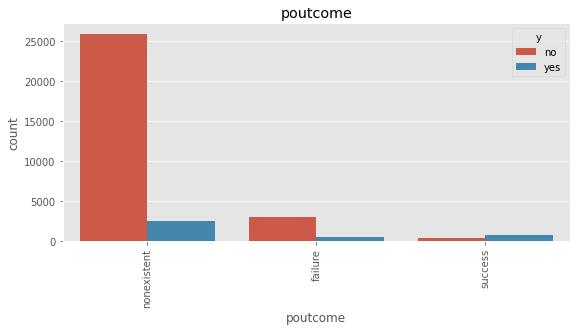

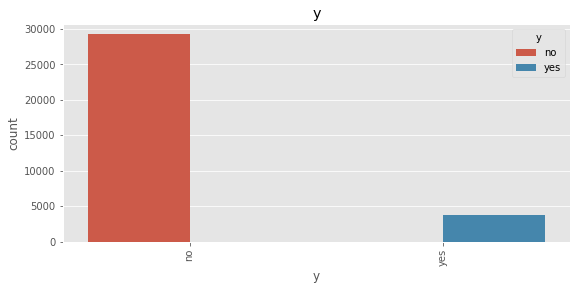

In [26]:


for column in categorical_col:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.countplot(x=dataframe[column],hue=dataframe['y'],data=dataframe)
    plt.title(column)    
    plt.xticks(rotation=90)

### Observations:

- The common traits seen for customers who have subscribed for the term deposit are :
    - Customers having administrative jobs form the majority amongst those who have subscirbed to the term deposit with technicians being the second majority.
    - They are married 
    - They hold a university degree
    - They do not hold a credit in default
    - Housing loan doesn't seem a priority to check for since an equal number of customers who have and have not subscribed to it seem to have subscribed to the term deposit.
    - Cell-phones should be the preferred mode of contact for contacting customers.

## Function to Label Encode Categorical variables

Before applying our machine learning algorithm, we need to recollect that any algorithm can only read numerical values. It is therefore essential to encode categorical features into numerical values. Encoding of categorical variables can be performed in two ways:
- Label Encoding
- One-Hot Encoding.

For the given dataset, we are going to one-hot encode the categorical columns. 



In [27]:
# Encode Categorical Variables - one hot encoding
from sklearn.preprocessing import OneHotEncoder 
le=OneHotEncoder()
for feature in categorical_col:
    dataframe[feature] = le.fit_transform(np.array(dataframe[feature]).reshape(-1,1)).toarray()

In [28]:
dataframe.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
0,49,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,227,4,0.0,1.0
1,37,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,202,2,1.0,1.0
2,55,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,550,1,0.0,0.0
3,36,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,120,2,0.0,1.0
4,55,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,368,2,0.0,1.0
5,29,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,256,2,0.0,1.0
6,28,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,449,1,0.0,0.0
7,30,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,126,2,0.0,1.0
8,50,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,550,1,0.0,1.0
9,33,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,498,5,0.0,1.0


In [29]:
dataframe.to_csv(r'preprocessed_data.csv',index=False)